In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
ths = np.zeros((20, 80))

In [12]:
for i in range(20):
    try:
        d = np.load(f'results_weak_scale/experiment_{i}.npy', allow_pickle=True)
    except:
        print(i)
        continue
    start_time = d[0][1]
    for res, time in d:
        real_time = time - start_time
        ths[i, round(real_time / 5)] += 1


In [13]:
all = []
for rep in range(20):
    for time in range(48):
        all.append((time * 5, ths[rep, time]))

In [14]:
df = pd.DataFrame(all, columns=['time', 'th'])

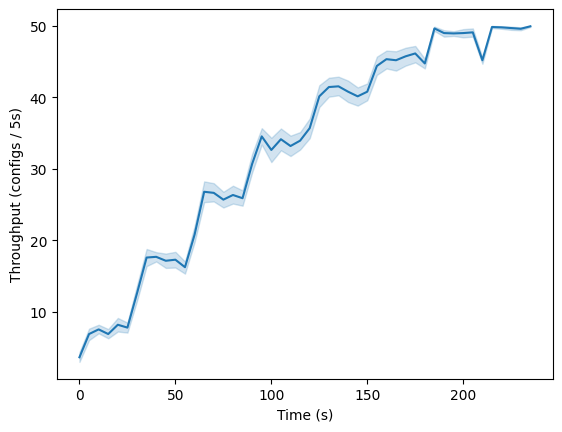

In [15]:
sns.lineplot(data=df, x='time', y='th')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (configs / 5s)')
plt.savefig('figures/weak_scale.png')
plt.savefig('figures/weak_scale.pdf')